In [1]:
# Import packages
import glob, os
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import math
from itertools import chain
import seaborn as sns

# folklore

'folklore' is considered a complete left turn in the type of music Taylor Swift releases. This has recieved some of the best praise from critics. I want to compare in terms of word choice this album which is considered quality music by critics to 'Taylor Swift', her debut album.

In [2]:
# Change directory for folklore album 
os.chdir('Taylor_Swift')

In [3]:
# Iterate through each song in folklore and extract the title and text
folklore = []
for file in sorted(glob.glob('folklore/*.txt')):
    # Remove punctuation and make all letters lowercase - this will ensure words are not double counted later
    text = open(file).read().translate(str.maketrans(',?.:;()', '       '))
    # Title is the first line
    title = text.partition('\n')[0]
    # Remove title and split the remaining text into separate words
    text = text.replace(title, '').lower().split()
    # Remove stop words since they do not provide meaning
    stop_words = stopwords.words('english')
    text = [x for x in text if not x in stop_words]
    # Add title and lyrics into dictinoary 
    folklore.append({
        'Title': title,
        'Lyrics': text,
        'Total Length': len(text),
        'Unique Words': len(set(text))
    })

#### Number of unique words for each song

In [4]:
# Look at all lyrics from the entire album
folklore_all_lyrics = [x['Lyrics'] for x in folklore]
folklore_all_lyrics = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in folklore_all_lyrics))

In [5]:
print('The total number of words in Folklore is', len(folklore_all_lyrics))
print('The number of unique words in Folklore is', len(set(folklore_all_lyrics)))

The total number of words in Folklore is 2260
The number of unique words in Folklore is 919


In [6]:
folklore_df=pd.DataFrame([dict((k,x[k]) for k in ['Title','Total Length','Unique Words'] if k in x) for x in folklore])
folklore_df['Percent Unique'] = folklore_df['Unique Words']/folklore_df['Total Length']*100
folklore_df

,Title,Total Length,Unique Words,Percent Unique
0,the 1,145,87,60.000000
1,cardigan,161,103,63.975155
2,the last great american dynasty,175,119,68.000000
3,exile,229,82,35.807860
4,my tears ricochet,125,90,72.000000
5,mirrorball,127,63,49.606299
6,seven,102,71,69.607843
7,august,183,68,37.158470
8,this is me trying,94,67,71.276596
9,illicit affairs,125,90,72.000000


In [7]:
folklore_df['Percent Unique'].mean()

60.81959784336583

### Most used words

In [8]:
# Create function to show top words
def top_words(text, top = None):
    count = dict()
    for word in text:
        if word in count:
            count[word] += 1
        else:
            count[word] = 1
    if(top is not None):
        sorted_count = sorted(count, key=count.get, reverse=True)[:top]
        top_words = {key: count[key] for key in sorted_count}
        return top_words
    else:
        return count

In [9]:
# Top words for album
folklore_top = pd.DataFrame(top_words(folklore_all_lyrics,top=25).items(),columns=['Word','Count'])
folklore_top.index = folklore_top.index + 1
folklore_top.loc[:12,:]

,Word,Count
1,never,45
2,know,42
3,time,38
4,like,38
5,i'm,36
6,would,22
7,think,21
8,one,19
9,gave,19
10,knew,18


In [10]:
folklore_top.loc[13:,:]

,Word,Count
13,see,15
14,still,15
15,said,13
16,back,13
17,love,13
18,come,12
19,seen,12
20,showed,11
21,want,11
22,call,11


In [11]:
folklore_top_counts = [{'Title': x['Title'], 'Counts': top_words(x['Lyrics'], top=8)} for x in folklore]

In [12]:
for song in folklore_top_counts:
    print(song['Title'])
    for word in song['Counts']:
        print(word,':', song['Counts'][word])
    print('\n')

the 1
never : 10
would've : 9
know : 6
one : 4
time : 3
something : 3
think : 3
defense : 3


cardigan
knew : 13
like : 7
young : 5
assume : 4
know : 4
nothing : 4
come : 4
back : 4


the last great american dynasty
time : 8
marvelous : 7
goes : 6
ruining : 5
town : 4
seen : 4
money : 3
said : 3


exile
never : 15
gave : 12
sign : 8
many : 8
signs : 8
around : 7
think : 6


my tears ricochet
go : 5
i'm : 4
cursing : 4
name : 4
wishing : 4
stayed : 4
grace : 3
look : 3


mirrorball
i'm : 11
still : 7
know : 5
hush : 4
tallest : 4
tiptoes : 4
spinning : 4
highest : 4


seven
love : 6
like : 4
still : 3
tell : 3
passed : 3
folk : 3
please : 2
picture : 2


august
hope : 11
mine : 10
never : 9
'cause : 8
see : 6
us : 6
august : 6
away : 6


this is me trying
know : 9
wanted : 6
i'm : 4
hard : 3
lot : 2
regrets : 2
maybe : 2
quite : 2


illicit affairs
times : 4
call : 4
leave : 3
meetings : 3
dies : 3
million : 3
little : 3
lie : 3


invisible string
time : 6
think : 4
string : 4
ooh-ooh-o

In [13]:
folklore_counts = [{'Title': x['Title'], 'Counts': top_words(x['Lyrics'])} for x in folklore]

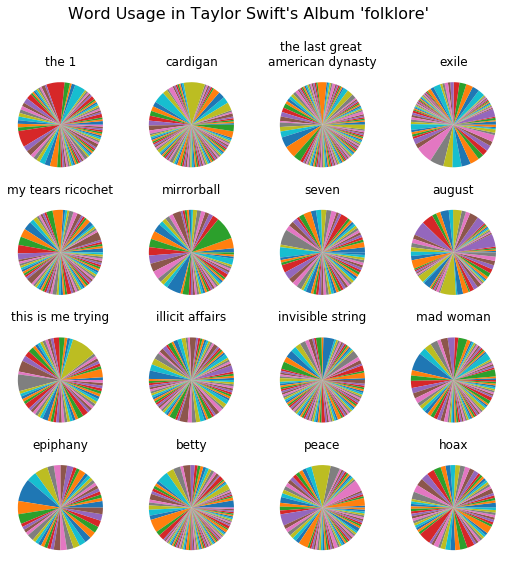

In [14]:
fig, axs = plt.subplots(4,4,figsize=(9,9),subplot_kw={'aspect':'equal'})
axs = axs.flatten()
for ax, song in zip(axs,folklore_counts):
    sizes = []
    for x, y in song['Counts'].items():
        sizes.append(y)
    ax.pie(sizes)
    if(int(len(song['Title']) < 25)):
        ax.set_title(song['Title'])
    else:
        split = math.floor(int(len(song['Title']))/2)
        title_line1 = song['Title'][:split]
        title_line2 = song['Title'][split:]
        ax.set_title(title_line1+'\n'+title_line2)
fig.suptitle("Word Usage in Taylor Swift's Album 'folklore'",fontsize=16)
plt.show()

# Taylor Swift

In [14]:
# Iterate through each song in folklore and extract the title and text
Taylor_Swift = []
for file in sorted(glob.glob('Taylor_Swift/*.txt')):
    # Remove punctuation and make all letters lowercase - this will ensure words are not double counted later
    text = open(file).read().translate(str.maketrans(',?.:;()', '       '))
    # Title is the first line
    title = text.partition('\n')[0]
    # Remove title and split the remaining text into separate words
    text = text.replace(title, '').lower().split()
    # Remove stop words since they do not provide meaning
    stop_words = stopwords.words('english')
    text = [x for x in text if not x in stop_words]
    # Add title and lyrics into dictinoary 
    Taylor_Swift.append({
        'Title': title,
        'Lyrics': text,
        'Total Length': len(text),
        'Unique Words': len(set(text))
    })

#### Number of unique words for each song

In [15]:
# Look at all lyrics from the entire album
Taylor_Swift_all_lyrics = [x['Lyrics'] for x in Taylor_Swift]
Taylor_Swift_all_lyrics = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in Taylor_Swift_all_lyrics))

In [16]:
print("The total number of words in 'Taylor Swift' is", len(Taylor_Swift_all_lyrics))
print("The number of unique words in 'Taylor Swift' is", len(set(Taylor_Swift_all_lyrics)))

The total number of words in 'Taylor Swift' is 1892
The number of unique words in 'Taylor Swift' is 544


In [18]:
TS_df = pd.DataFrame([dict((k,x[k]) for k in ['Title','Total Length','Unique Words'] if k in x) for x in Taylor_Swift])
TS_df['Percent Unique'] = TS_df['Unique Words']/TS_df['Total Length']*100
TS_df

,Title,Total Length,Unique Words,Percent Unique
0,Tim McGraw,176,85,48.295455
1,Picture to Burn,162,71,43.827160
2,Teardrops On My Guitar,138,84,60.869565
3,A Place In This World,123,54,43.902439
4,Cold As You,110,65,59.090909
5,The Outside,101,50,49.504950
6,Tied Together With A Smile,113,53,46.902655
7,Stay Beautiful,150,75,50.000000
8,Should've Said No,141,64,45.390071
9,Mary's Song,148,99,66.891892


In [24]:
TS_df['Percent Unique'].mean()

49.27637848854748

### Most used words

In [145]:
# Top words for album
TS_top = pd.DataFrame(top_words(Taylor_Swift_all_lyrics, top = 25).items(), columns = ['Word', 'Count'])
TS_top.index = TS_top.index + 1
TS_top.loc[:12,:]

,Word,Count
1,i'm,43
2,oh,33
3,know,32
4,think,26
5,never,25
6,back,25
7,would,22
8,wanna,22
9,said,21
10,see,19


In [146]:
TS_top.loc[13:,:]

,Word,Count
13,like,17
14,love,17
15,way,15
16,he's,15
17,time,14
18,song,14
19,baby,14
20,take,14
21,hope,13
22,'cause,13


In [20]:
Taylor_Swift_top_counts = [{'Title': x['Title'], 'Counts': top_words(x['Lyrics'], top=8)} for x in Taylor_Swift]

In [21]:
for song in Taylor_Swift_top_counts:
    print(song['Title'])
    for word in song['Counts']:
        print(word,':', song['Counts'][word])
    print('\n')

Tim McGraw
think : 22
hope : 10
blue : 5
night : 5
said : 4
little : 4
back : 4
long : 3


Picture to Burn
burn : 9
really : 6
i'm : 5
bad : 5
time : 5
hate : 4
stupid : 4
old : 4


Teardrops On My Guitar
he's : 12
drew : 4
wishing : 4
know : 4
see : 3
got : 3
'cause : 3
can't : 3


A Place In This World
i'm : 16
oh : 13
girl : 7
know : 6
i'll : 6
trying : 5
that's : 5
alone : 4


Cold As You
never : 6
i'm : 4
away : 4
oh : 3
shame : 3
rainy : 3
ending : 3
given : 3


The Outside
i've : 7
ever : 6
outside : 6
looking : 4
see : 4
never : 4
try : 3
better : 3


Tied Together With A Smile
one : 7
baby : 6
smile : 5
tied : 4
together : 4
coming : 4
undone : 4
'cause : 3


Stay Beautiful
beautiful : 13
oh : 8
know : 6
stay : 5
na : 5
every : 4
little : 3
piece : 3


Should've Said No
back : 10
said : 8
get : 6
gone : 4
go : 4
baby : 4
say : 3
"no" : 3


Mary's Song
take : 6
said : 5
oh : 5
back : 5
two : 4
like : 3
used : 3
mamas : 3


Our Song
song : 8
late : 6
got : 5
'cause : 4
way : 4
s

In [22]:
Taylor_Swift_counts = [{'Title': x['Title'], 'Counts': top_words(x['Lyrics'])} for x in Taylor_Swift]

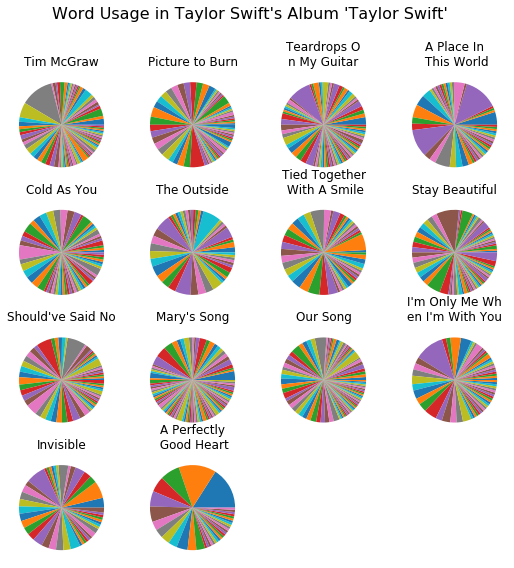

In [23]:
fig, axs = plt.subplots(4,4,figsize=(9,9),subplot_kw={'aspect':'equal'})
axs[3,3].axis('off')
axs[3,2].axis('off')
axs = axs.flatten()
for ax, song in zip(axs,Taylor_Swift_counts):
    sizes = []
    for x, y in song['Counts'].items():
        sizes.append(y)
    ax.pie(sizes)
    if(int(len(song['Title']) < 20)):
        ax.set_title(song['Title'])
    else:
        split = math.floor(int(len(song['Title']))/2)
        title_line1 = song['Title'][:split]
        title_line2 = song['Title'][split:]
        ax.set_title(title_line1+'\n'+title_line2)
fig.suptitle("Word Usage in Taylor Swift's Album 'Taylor Swift'",fontsize=16)
plt.show()

# Comparison

NameError: name 'TS_df' is not defined

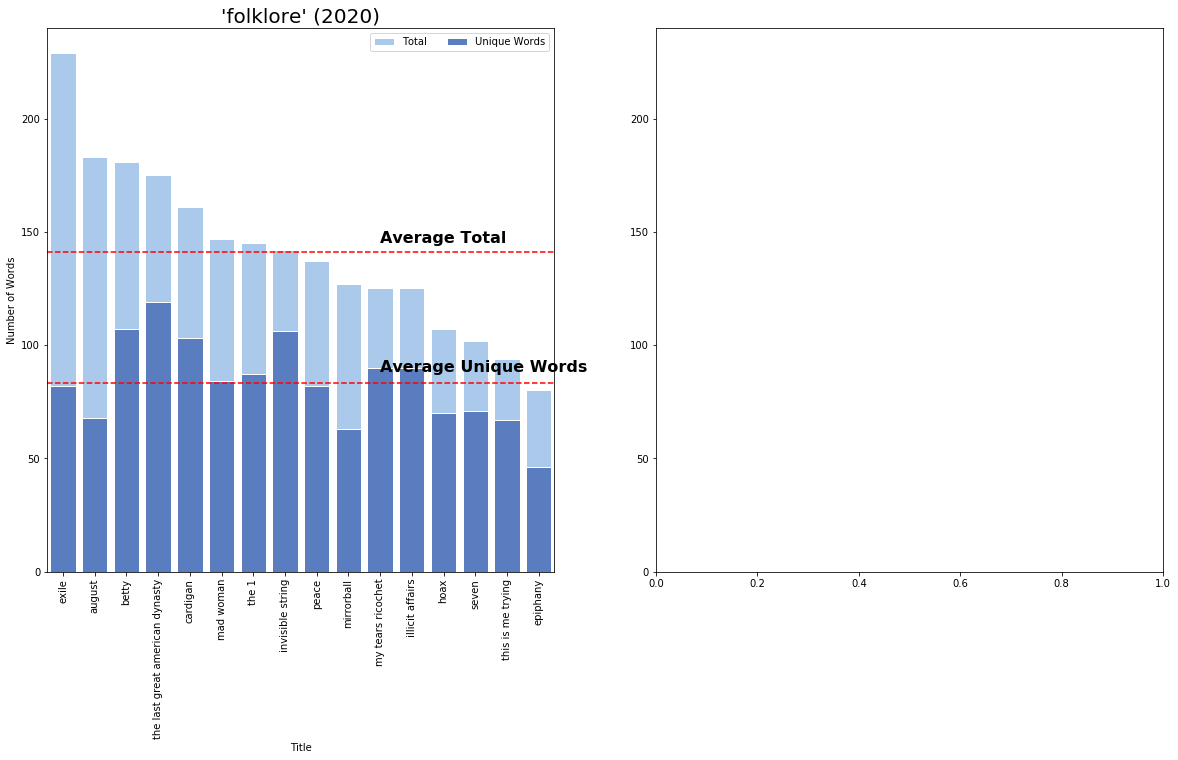

In [15]:
f, ax = plt.subplots(1,2, figsize=(20,10))
plt.setp(ax, ylim=[0,240])

sns.set_color_codes('pastel')
sns.barplot(x = 'Title', y = 'Total Length', data = folklore_df.sort_values('Total Length', ascending=False),
            label = 'Total', color = 'b', edgecolor = 'w', ax=ax[0])
sns.set_color_codes('muted')
sns.barplot(x = 'Title', y = 'Unique Words', data = folklore_df.sort_values('Total Length',ascending=False),
            label = 'Unique Words', color = 'b', edgecolor = 'w', ax=ax[0])
ax[0].axhline(folklore_df['Total Length'].mean(), ls='--', c='red')
ax[0].text(10,145, "Average Total", fontsize=16, fontweight='bold')
ax[0].axhline(folklore_df['Unique Words'].mean(), ls='--', c='red')
ax[0].text(10,88, "Average Unique Words", fontsize=16, fontweight='bold')
ax[0].legend(ncol = 2, loc = 'upper right')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_ylabel('Number of Words')
ax[0].set_title("'folklore' (2020)", fontsize=20)


sns.set_color_codes('pastel')
sns.barplot(x = 'Title', y = 'Total Length', data = TS_df.sort_values('Total Length',ascending=False),
            label = 'Total', color = 'b', edgecolor = 'w', ax=ax[1])
sns.set_color_codes('muted')
sns.barplot(x = 'Title', y = 'Unique Words', data = TS_df.sort_values('Total Length',ascending=False),
            label = 'Unique Words', color = 'b', edgecolor = 'w', ax=ax[1])
ax[1].axhline(TS_df['Total Length'].mean(), ls='--', c='red')
ax[1].text(9,140, "Average Total", fontsize=16, fontweight='bold')
ax[1].axhline(TS_df['Unique Words'].mean(), ls='--', c='red')
ax[1].text(8,72, "Average Unique Words", fontsize=16, fontweight='bold')
ax[1].legend(ncol = 2, loc = 'upper right')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_ylabel('Number of Words')
ax[1].set_title("'Taylor Swift' (2006)", fontsize=20)
f.suptitle("Word Usage in Taylor Swift Albums", fontsize=30, fontweight='bold')
plt.savefig('Word_Usage_Comparison.png')